In [1]:
!pip install pandas scikit-learn matplotlib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Section I Introduction

# Section II Literature Review

# Section III Methodology

## 3.1 ARIMA Model

ARIMA model has notable strengths for forecasting carbon prices, utilizing its robust capability to process time series data and capture the dynamic patterns in the volatile carbon prices. These features facilitate a comprehensive analysis, making ARIMA an ideal choice for short-term forecasting. However, we also need to acknowledge its potential limitations, such as the assumption of linearity and the need for data stationarity, which may cause potential issues.

Central to the ARIMA model is its ability to integrate autoregressive (AR) processes, differencing (I) to achieve stationarity, and moving average (MA) processes into a unified structure. The model is parameterized by three integers: $p$, $d$, and $q$, which denote the autoregressive order, the degree of differencing, and the moving average order, respectively. Mathematically, the ARIMA($p$,$d$,$q$) model is expressed as:
$$
x_t = u + \alpha_1 x_{t-1} + \alpha_2 x_{t-2} + \ldots + \alpha_p x_{t-p} - \beta_1 \varepsilon_{t-1} - \beta_2 \varepsilon_{t-2} - \ldots - \beta_q \varepsilon_{t-q} + \varepsilon_t
$$

Here, $x_t$ represents the forcasted carbon price at time $t$, and $u$ is a constant term (which can be interpreted as the mean of the series if $d = 0 $). The parameters $\alpha_1, \alpha_2, \ldots, \alpha_p$ represent the autoregressive (AR) terms, $\beta_1, \beta_2, \ldots, \beta_q$ represent the moving average (MA) terms, and $\varepsilon_{t-1}, \varepsilon_{t-2}, \ldots, \varepsilon_{t-q}$ are the lagged forecast errors in the prediction equation.

In this study, we employed the ARIMA model to analyze fluctuations in carbon prices. Our approach commenced with an initial hypothesis based on a preliminary examination of the dataset to identify any apparent trends and autocorrelations. Utilizing diagnostic tools such as autocorrelation and partial autocorrelation plots, alongside statistical tests, we determined the optimal differencing order and the appropriate orders for the autoregressive and moving average components of the model. This step also included assessments for the inclusion of seasonal adjustments. Subsequent to model identification, we engaged in parameter estimation through Maximum Likelihood Estimation methods to accurately fit the model to the historical data. The model was then validated to ensure that the residuals approximated white noise, indicating that the model captured the essential structures in the data. Following validation, we proceeded to utilize the ARIMA model for forecasting future carbon prices, leveraging its capability to analyze and interpret underlying trends in the data over various forecasting horizons. This methodological framework underpins our analysis and forecasts presented herein.

## 3.2 Random Forest

In this study, the Random Forest (RF) methodology was employed as the second ensemble-based predictive model for forecasting carbon prices. Random Forest is a form of the ensemble method known as Bagging, or Bootstrap Aggregating, which operates on the principle of creating multiple datasets from the original training set through bootstrap sampling. This sampling technique involves random selection with replacement, resulting in subsets where individual instances may repeat or be excluded.

Renowned for its robustness, the Random Forest is inherently adept at handling large, high-dimensional datasets and mitigating overfitting—a common pitfall in complex models. The ensemble nature of Random Forest, where multiple decision trees vote on the outcome, reduces variance and enhances performance stability. Nonetheless, it may incur considerable computational expense, particularly with a large number of trees, and can be less interpretable due to its ensemble complexity.

Implementation within this study followed a systematic approach: An ensemble of decision trees was constructed, each predicated on a distinct bootstrap sample. Key parameters, such as the number of trees (denoted as n_estimators in machine learning frameworks), maximum depth, and the number of features considered at each split, were meticulously calibrated. The decision trees were trained individually, allowing the model to capture complex, nonlinear relationships without relying on a single overarching trend. For the predictive phase, the Random Forest aggregated outputs from individual trees. In regression tasks, such as the prediction of carbon prices, the ensemble's prediction corresponds to the average of the outputs, thereby converging towards a central tendency.

## 3.3 LSTM Model

# Section IV Data and Descriptive Statistics

In [2]:
carbon_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Carbon%20Price.csv'
carbon_price = pd.read_csv(carbon_price_url, header=0)
carbon_price['Date'] = pd.to_datetime(carbon_price['Date'])

energy_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Energy.csv'
energy_price = pd.read_csv(energy_price_url, header=0)
energy_price['Date'] = pd.to_datetime(energy_price['Date'])

policy_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Policy.csv'
policy = pd.read_csv(policy_url, header=0)
policy['Date'] = pd.to_datetime(policy['Date'])

market_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Market.csv'
market = pd.read_csv(market_url, header=0)
market['Date'] = pd.to_datetime(market['Date'])

weather_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Weather.csv'
weather = pd.read_csv(weather_url, header=0)
weather['Date'] = pd.to_datetime(weather['Date'])

# Perform the merges
df = pd.merge(carbon_price, energy_price, on='Date', how='inner')
df = pd.merge(df, policy, on='Date', how='inner')
df = pd.merge(df, market, on='Date', how='inner')
df = pd.merge(df, weather, on='Date', how='inner')
df = df.dropna()

In [3]:
df.head()

,Date,Carbon,Coal,Crude Oil,Natural Gas,Fit_for_55,Law,Compromise,EPU,DAX,SPGTCLNT,FTMIB,CAC40,AEX,STOXX,Temperature,Precipitation,Solar Energy,Wind Speed
0,2024-01-31,64.40,99.60,81.71,30.235,1,1,1,321.779981,16903.76,1190.37,30744.24,7656.75,818.21,485.67,7.6,0.000,1.9,8.4
1,2024-01-30,64.02,96.15,82.87,29.391,1,1,1,321.779981,16972.34,1185.53,30623.27,7677.47,820.64,485.63,9.9,0.000,1.2,8.0
2,2024-01-29,61.77,94.30,82.40,28.175,1,1,1,321.779981,16941.71,1198.50,30233.61,7640.81,819.91,484.84,8.6,0.000,1.8,9.4
5,2024-01-26,63.10,106.00,83.55,28.079,1,1,1,321.779981,16961.39,1188.55,30379.33,7634.14,817.74,483.84,9.9,0.742,2.0,13.5
6,2024-01-25,63.41,105.60,82.43,27.785,1,1,1,321.779981,16906.92,1194.79,30157.80,7464.20,814.87,478.53,11.2,0.728,1.0,8.4


In [4]:
df['Carbon'].count()

763

In the analysis of carbon pricing trends within the European Union's Emissions Trading System (EU ETS), this study draws upon a meticulously compiled dataset encompassing the period from January 1, 2021, to January 31, 2024. During this time frame, a total of 763 data points were collected, providing a granular view of carbon price movements. The carbon price data, sourced from Investing.com, is critical for understanding the economic implications of regulatory shifts and market dynamics under the EU's climate policy framework.

This timeframe is deliberately aligned with the initiation of Phase 4 of the European Union's Emissions Trading System (EU ETS), marking a significant transition from the system's previous phases. The focus on this specific period is due to the substantial regulatory shifts introduced in Phase 4, which differ markedly from the earlier phases in terms of emissions reduction targets and allowance allocation mechanisms.

Notably, in Phase 3 of the EU ETS (2013-2020), the Union-wide cap for stationary installations was subject to an annual decrease by a linear reduction factor of 1.74%, with the 2013 cap determined based on the average total quantity of allowances issued annually during 2008-2012. Conversely, Phase 4 (2021-2030) introduces a more aggressive approach to emissions reduction, with the cap on emissions decreasing annually at an increased linear reduction factor of 2.2%. This heightened ambition reflects the EU's commitment to achieving more substantial emissions reductions and necessitates an in-depth analysis of carbon pricing trends under the new regulatory framework. The study aims to isolate the impacts of these changes on carbon pricing, underscoring the importance of understanding the dynamics introduced by Phase 4's enhanced regulatory measures.

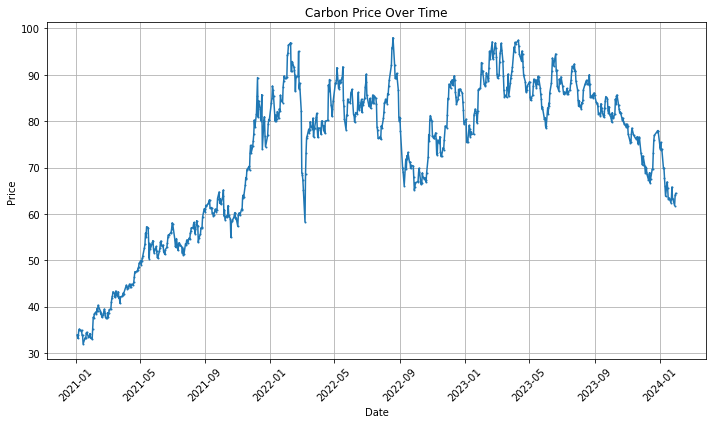

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Carbon'], marker='o', markersize=1, linestyle='-')
plt.title('Carbon Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
for column_name in df.columns[1:]:
    column = df[column_name]
    mean = column.mean()
    variance = column.var()
    sd = column.std()
    max_value = column.max()
    min_value = column.min()
    
    print(column_name)
    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", sd)
    print("Maximum:", max_value)
    print("Minimum:", min_value)
    print()

Carbon
Mean: 72.98309305373526
Variance: 270.6564305779436
Standard Deviation: 16.451639145627514
Maximum: 98.01
Minimum: 31.96

Coal
Mean: 176.4729357798166
Variance: 8734.74971604181
Standard Deviation: 93.45988292332603
Maximum: 439.0
Minimum: 63.75

Crude Oil
Mean: 83.81741808650057
Variance: 203.24808426985607
Standard Deviation: 14.256510241635436
Maximum: 127.98
Minimum: 51.09

Natural Gas
Mean: 72.44877326343386
Variance: 2982.6553067792393
Standard Deviation: 54.61369156886613
Maximum: 339.195
Minimum: 15.525

Fit_for_55
Mean: 0.8296199213630406
Variance: 0.1415362070566876
Standard Deviation: 0.3762129809784447
Maximum: 1
Minimum: 0

Law
Mean: 0.21756225425950196
Variance: 0.17045231731355004
Standard Deviation: 0.41285871350081743
Maximum: 1
Minimum: 0

Compromise
Mean: 0.24508519003931847
Variance: 0.18526124601397495
Standard Deviation: 0.43041984853625764
Maximum: 1
Minimum: 0

EPU
Mean: 276.877176285846
Variance: 4871.89127434141
Standard Deviation: 69.7989346218222
Maxi

The descriptive statistics of our dataset from January 2021 to January 2024 reveal the carbon price's behavior during the EU ETS Phase 4, with a mean value of €72.98 and standard deviation indicating market volatility. The time series plot underscores these price fluctuations over the 763 observations. Complementing this, we observed varied patterns in related energy commodities and European stock indices, alongside weather variables that could influence emission levels and carbon market dynamics, all of which will be explored further in our econometric analysis.

# Section V Forcasting of Carbon Price

## 5.1 Evaluation Criteria

## 5.2 Parameter Determination

### AR Model

##### AR(1)

In [7]:
y = df['Carbon']

modelAR1 = AutoReg(y, lags=1)
resultAR1 = modelAR1.fit()

print(resultAR1.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(1)   Log Likelihood               -1634.677
Method:               Conditional MLE   S.D. of innovations              2.067
Date:                Mon, 08 Apr 2024   AIC                              1.460
Time:                        14:46:20   BIC                              1.479
Sample:                             1   HQIC                             1.468
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2818      0.342      0.824      0.410      -0.389       0.952
Carbon.L1      0.9956      0.005    217.881      0.000       0.987       1.005
                                    Roots           

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [8]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(y)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.860279
p-value: 0.800772
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [9]:
y_diff = y.diff().dropna()


modelAR1_diff = AutoReg(y_diff, lags=1)
resultAR1_diff = modelAR1_diff.fit()

print(resultAR1_diff.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  762
Model:                     AutoReg(1)   Log Likelihood               -1632.719
Method:               Conditional MLE   S.D. of innovations              2.068
Date:                Mon, 08 Apr 2024   AIC                              1.461
Time:                        14:46:21   BIC                              1.479
Sample:                             1   HQIC                             1.468
                                  762                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0414      0.075     -0.553      0.581      -0.188       0.106
Carbon.L1     -0.0448      0.036     -1.236      0.216      -0.116       0.026
                                    Roots           

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


##### AR(2)

In [10]:
modelAR2 = AutoReg(y, lags=2)
resultAR2 = modelAR2.fit()

print(resultAR2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(2)   Log Likelihood               -1632.351
Method:               Conditional MLE   S.D. of innovations              2.067
Date:                Mon, 08 Apr 2024   AIC                              1.463
Time:                        14:46:21   BIC                              1.487
Sample:                             2   HQIC                             1.472
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2461      0.344      0.716      0.474      -0.427       0.920
Carbon.L1      0.9542      0.036     26.344      0.000       0.883       1.025
Carbon.L2      0.0419      0.036      1.152      0.2

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [11]:
residuals = resultAR2.resid

if np.isnan(residuals).any() or np.isinf(residuals).any():
    residuals = residuals[~(np.isnan(residuals) | np.isinf(residuals))]

adf_test = adfuller(residuals)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -23.324922
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


### ARIMA Model

In [12]:
X = df.drop(columns=['Date','Carbon'])
_y = df['Carbon']

<Figure size 720x432 with 0 Axes>

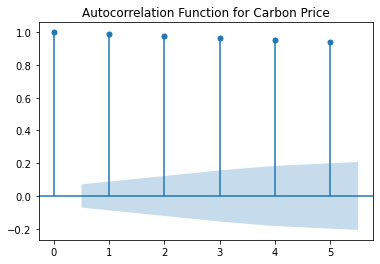

In [13]:
plt.figure(figsize=(10, 6))
plot_acf(df['Carbon'], lags=5, alpha=0.05)
plt.title('Autocorrelation Function for Carbon Price')
plt.show()

<Figure size 720x432 with 0 Axes>

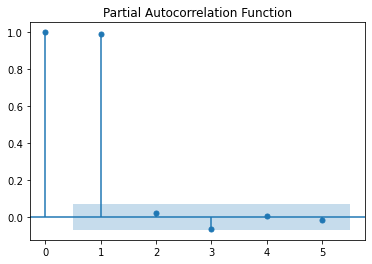

In [14]:
plt.figure(figsize=(10, 6))
plot_pacf(_y, lags=5, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

##### ARIMA(1,0,0)

In [15]:
model_arima100 = ARIMA(_y, exog=X, order=(1,0,0))
model_arima100_fit = model_arima100.fit()

print(model_arima100_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1676.669
Date:                Mon, 08 Apr 2024   AIC                           3393.337
Time:                        14:46:27   BIC                           3486.083
Sample:                             0   HQIC                          3429.045
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     10.978      1.580      0.114      -4.176      38.856
Coal             -0.0049      0.008     -0.614      0.539      -0.020       0.011
Crude Oil         0.2873      0.038     

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(1,0,1)

In [16]:
model_arima101 = ARIMA(_y, exog=X, order=(1,0,1))
model_arima101_fit = model_arima101.fit()

print(model_arima101_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1683.086
Date:                Mon, 08 Apr 2024   AIC                           3408.172
Time:                        14:46:31   BIC                           3505.554
Sample:                             0   HQIC                          3445.665
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     11.018      1.574      0.116      -4.254      38.934
Coal             -0.0163      0.008     -1.992      0.046      -0.032      -0.000
Crude Oil         0.2955      0.037     

##### ARIMA(1,1,0)

In [17]:
model_arima110 = ARIMA(_y, exog=X, order=(1,1,0))
model_arima110_fit = model_arima110.fit()

print(model_arima110_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1587.702
Date:                Mon, 08 Apr 2024   AIC                           3213.405
Time:                        14:46:34   BIC                           3301.488
Sample:                             0   HQIC                          3247.320
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0032      0.007     -0.460      0.645      -0.017       0.010
Crude Oil         0.0447      0.037      1.204      0.228      -0.028       0.117
Natural Gas       0.0136      0.008     

##### ARIMA(1,1,1); Best Performing Model

In [18]:
model_arima111 = ARIMA(_y, exog=X, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1585.450
Date:                Mon, 08 Apr 2024   AIC                           3210.899
Time:                        14:46:41   BIC                           3303.618
Sample:                             0   HQIC                          3246.599
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0040      0.007     -0.573      0.567      -0.018       0.010
Crude Oil         0.0395      0.037      1.076      0.282      -0.032       0.112
Natural Gas       0.0153      0.008     

##### ARIMA(2,0,0)

In [19]:
model_arima200 = ARIMA(_y, exog=X, order=(2,0,0))
model_arima200_fit = model_arima200.fit()

print(model_arima200_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1678.536
Date:                Mon, 08 Apr 2024   AIC                           3399.072
Time:                        14:46:47   BIC                           3496.454
Sample:                             0   HQIC                          3436.565
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     10.978      1.579      0.114      -4.177      38.857
Coal             -0.0156      0.008     -1.878      0.060      -0.032       0.001
Crude Oil         0.2931      0.037     

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,1,0)

In [20]:
model_arima210 = ARIMA(_y, exog=X, order=(2,1,0))
model_arima210_fit = model_arima210.fit()

print(model_arima210_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1585.252
Date:                Mon, 08 Apr 2024   AIC                           3210.503
Time:                        14:46:50   BIC                           3303.222
Sample:                             0   HQIC                          3246.203
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0039      0.007     -0.566      0.571      -0.018       0.010
Crude Oil         0.0430      0.036      1.179      0.238      -0.028       0.115
Natural Gas       0.0152      0.008     

##### ARIMA(2,0,1)

In [21]:
model_arima201 = ARIMA(_y, exog=X, order=(2,0,1))
model_arima201_fit = model_arima201.fit()

print(model_arima201_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1678.286
Date:                Mon, 08 Apr 2024   AIC                           3400.572
Time:                        14:46:57   BIC                           3502.592
Sample:                             0   HQIC                          3439.851
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     11.066      1.567      0.117      -4.349      39.029
Coal             -0.0161      0.008     -1.925      0.054      -0.032       0.000
Crude Oil         0.2936      0.037     

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,1,1)

In [22]:
model_arima211 = ARIMA(_y, exog=X, order=(2,1,1))
model_arima211_fit = model_arima211.fit()

print(model_arima211_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1585.249
Date:                Mon, 08 Apr 2024   AIC                           3212.498
Time:                        14:47:01   BIC                           3309.853
Sample:                             0   HQIC                          3249.983
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0040      0.007     -0.578      0.563      -0.018       0.010
Crude Oil         0.0430      0.037      1.175      0.240      -0.029       0.115
Natural Gas       0.0153      0.008     

## 5.3 Performance and Results

In [39]:
X = df.drop(['Date', 'Carbon'], axis=1)
y = df['Carbon']

### ARIMA Model

In [40]:
train_size = int(len(df) * 0.8)
train_indices = df.index[:train_size]
test_indices = df.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]
X_train, X_test = X.loc[train_indices], X.loc[test_indices]

In [41]:
model_arima111 = ARIMA(y_train, exog=X_train, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  610
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1311.150
Date:                Mon, 08 Apr 2024   AIC                           2662.300
Time:                        14:55:09   BIC                           2750.536
Sample:                             0   HQIC                          2696.626
                                - 610                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0042      0.008     -0.514      0.607      -0.020       0.012
Crude Oil         0.0429      0.044      0.980      0.327      -0.043       0.129
Natural Gas       0.0152      0.009     

In [42]:
forecast = model_arima111_fit.get_forecast(steps=len(y_test), exog=X_test)
y_pred = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [43]:
mse = mean_squared_error(y_test, forecast_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 6.600513955565015


### Random Forest

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 2.4830201770835325


In [47]:
# importance of variables
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

EPU              0.512976
Fit_for_55       0.196444
SPGTCLNT         0.076453
Crude Oil        0.044933
Coal             0.041055
FTMIB            0.031502
Natural Gas      0.027423
AEX              0.021751
CAC40            0.012578
STOXX            0.011108
Solar Energy     0.008974
DAX              0.006486
Temperature      0.004435
Wind Speed       0.002428
Precipitation    0.001408
Law              0.000027
Compromise       0.000017
dtype: float64


### LSTM Model

## 5.4 Discussion

# Section VI Conclusion